# 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

運行速度差異。Batch_size 越大,運行越快。

## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [32]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [33]:
from sklearn import preprocessing

In [34]:
train, test = keras.datasets.cifar10.load_data()

In [35]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
        x=x = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [36]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [45]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[256,128,64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [46]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
#BATCH_SIZE_EXP =[2, 16, 32, 128, 256]
BATCH_SIZE_EXP =[128, 256]
MOMENTUM = 0.95

In [47]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

for BATCH_SIZE in BATCH_SIZE_EXP:
    print( "Experiment with BATCH_SIZE = %.6f" % (BATCH_SIZE))
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

# Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "BATCH_SIZE %.6f" % (BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_39 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_40 (Batc (None, 128)               512       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
batch_normalization_41 (Batc (None, 64)                256

Epoch 46/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.2529 - accuracy: 0.9128 - val_loss: 2.4541 - val_accuracy: 0.4949
Epoch 47/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.2513 - accuracy: 0.9148 - val_loss: 2.4986 - val_accuracy: 0.4943
Epoch 48/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.2421 - accuracy: 0.9177 - val_loss: 2.4879 - val_accuracy: 0.4914
Epoch 49/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.2402 - accuracy: 0.9182 - val_loss: 2.5223 - val_accuracy: 0.4937
Epoch 50/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.2281 - accuracy: 0.9223 - val_loss: 2.5114 - val_accuracy: 0.4981
Experiment with BATCH_SIZE = 256.000000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.1124 - accuracy: 0.9706 - val_loss: 2.5092 - val_accuracy: 0.5014
Epoch 2/50
50000/

50000/50000 [==============================] - 6s 111us/step - loss: 0.0131 - accuracy: 0.9989 - val_loss: 3.4755 - val_accuracy: 0.4912


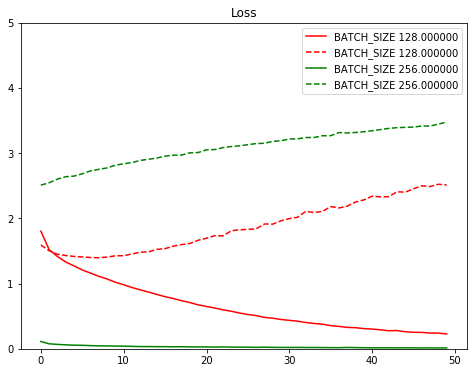

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

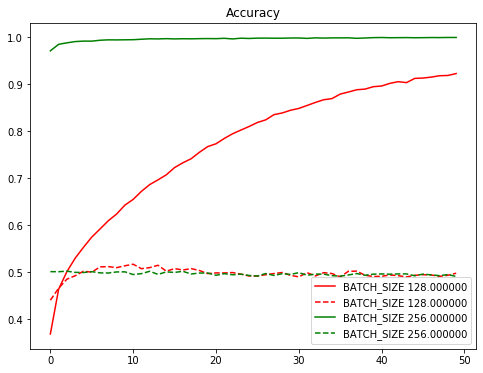

In [49]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

將 BN 放在 Activation 之前，所得訓練結果較佳。

In [50]:
def build_mlp_bf(input_shape, output_units=10, num_neurons=[256,128,64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
           
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [51]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
#BATCH_SIZE_EXP =[2, 16, 32, 128, 256]
BATCH_SIZE_EXP =[128, 256]
MOMENTUM = 0.95

In [52]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp_bf(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

for BATCH_SIZE in BATCH_SIZE_EXP:
    print( "Experiment with BATCH_SIZE = %.6f" % (BATCH_SIZE))
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

# Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "BATCH_SIZE %.6f" % (BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_43 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_44 (Batc (None, 128)               512       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650

Epoch 47/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.2194 - accuracy: 0.9265 - val_loss: 2.4991 - val_accuracy: 0.5016
Epoch 48/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.2214 - accuracy: 0.9250 - val_loss: 2.5528 - val_accuracy: 0.4982
Epoch 49/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.2055 - accuracy: 0.9311 - val_loss: 2.5621 - val_accuracy: 0.5013
Epoch 50/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.2089 - accuracy: 0.9288 - val_loss: 2.5960 - val_accuracy: 0.4951
Experiment with BATCH_SIZE = 256.000000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.0999 - accuracy: 0.9739 - val_loss: 2.5606 - val_accuracy: 0.5085
Epoch 2/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.0651 - accuracy: 0.9876 - val_loss: 2.5931 - val_accuracy: 0.5054
Epoch 3/50
50000/5

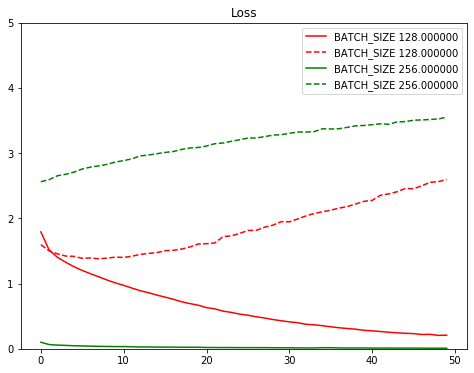

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

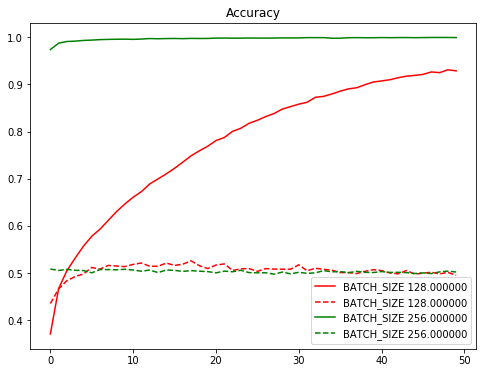

In [54]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()